<a href="https://colab.research.google.com/github/drwpls/cuda/blob/main/Final/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nhóm sinh viên:
1. Phan Lộc Sơn - 19120033
2. Nguyễn Xuân Vỵ - 19120732
3. Võ Song Nguyên - 

# Final: Song song hoá Seam carving

GET GPU's capability:

In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

ModuleNotFoundError: No module named 'numba'

In [6]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
import numpy as np
def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

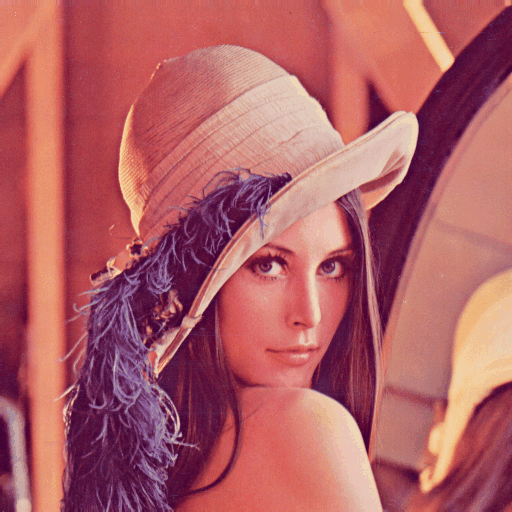

In [9]:
show_pnm('./images/lena.pnm')

clone code from github:

In [ ]:
%cd /content
!rm -rf cuda
!git clone -b main https://github.com/drwpls/cuda.git

Change working directory into Final folder:

In [ ]:
%cd ./cuda/Final

Verify current working directory:

In [ ]:
out_dir = get_ipython().getoutput('pwd')
assert out_dir[0] == '/content/cuda/Final'
out_dir[0]